In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pysta
import stc
import stcl

import os

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## load clustering results

In [5]:
def load_clustering(dataset_name, tap=8, dim=3):
    folder_name = "{}_tap{}_cov_classic_cluster_dim{}".format(dataset_name, tap, dim)
    filename = os.path.join(folder_name, "clusters_.csv")    

    return pd.read_csv(filename)

cluster_dim = 2
# cluster_dim = 3

cluster1 = load_clustering("20180618", dim=cluster_dim)
cluster1["dataset"] = "20180618"
cluster2 = load_clustering("20180621", dim=cluster_dim)
cluster2["dataset"] = "20180621"
cluster3 = load_clustering("20180626", dim=cluster_dim)
cluster3["dataset"] = "20180626"
# cluster4 = load_clustering("20180828")
# cluster4["dataset"] = "20180828"


# combine all patches 
# cluster = pd.concat([cluster1, cluster2, cluster3, cluster4])
cluster = pd.concat([cluster1, cluster2, cluster3])

print("total = ", len(cluster))
print(cluster["cell_type"].value_counts())
print(cluster["cell_type"].value_counts() / len(cluster))

total =  389
OFF        169
unknown    129
ON          91
Name: cell_type, dtype: int64
OFF        0.434447
unknown    0.331620
ON         0.233933
Name: cell_type, dtype: float64


In [6]:
cluster

,channel_name,num_spikes,cell_type,PSNR,eig1,eig2,eig3,converged,PSNR1,PSNR2,weight1,weight2,inner_product,max_weight,peak_diff,peak_diff1,peak_diff2,dataset
0,12a,1978,OFF,12.186541,0.971392,0.754007,0.737358,True,11.450823,10.235904,0.636834,0.363166,0.420599,0.636834,0.469666,0.522711,0.370558,20180618
1,12b,1228,ON,9.526389,0.920008,0.895442,0.871839,True,9.419680,7.839765,0.662558,0.337442,0.255689,0.662558,0.278502,0.264574,0.443452,20180618
2,12c,59,unknown,6.190784,4.805753,3.790327,3.660127,True,6.367350,2.000748,0.982759,0.017241,-0.280702,0.982759,0.423729,0.438596,1.000000,20180618
3,13a,963,OFF,11.134041,1.113298,1.056309,1.029772,True,11.420736,7.257810,0.897316,0.102684,0.466382,0.897316,0.369678,0.366133,0.797753,20180618
4,13b,415,ON,16.721866,1.266391,1.249651,1.216659,True,15.937224,7.861726,0.636176,0.363824,0.185476,0.636176,0.575904,0.603834,0.490196,20180618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,86c,705,ON,10.238226,1.188350,1.152660,1.125220,True,10.878715,6.213090,0.955128,0.044872,0.117121,0.955128,0.276596,0.290909,0.844444,20180626
152,86d,151,ON,8.678597,2.244849,2.097623,1.944011,True,8.677443,2.754759,0.986577,0.013423,0.476190,0.986577,0.403974,0.401361,1.000000,20180626
153,87a,9120,OFF,21.676952,0.590420,0.517161,0.512286,True,19.043271,14.230278,0.600327,0.399673,0.056832,0.600327,0.602632,0.678863,0.401437,20180626
154,87b,3797,ON,16.662341,0.487358,0.482080,0.475510,True,9.090881,12.160747,0.469121,0.530879,-0.128974,0.530879,0.321306,0.279676,0.387440,20180626


In [7]:
cluster.groupby("cell_type").mean()

,num_spikes,PSNR,eig1,eig2,eig3,converged,PSNR1,PSNR2,weight1,weight2,inner_product,max_weight,peak_diff,peak_diff1,peak_diff2
cell_type,,,,,,,,,,,,,,,
OFF,4555.485207,16.585761,1.177086,1.092602,1.045497,True,12.405428,10.314392,0.561508,0.438492,0.119448,0.711402,0.464034,0.558906,0.529769
ON,3263.219780,16.092398,0.931845,0.868955,0.839521,True,12.794743,10.525676,0.544275,0.455725,0.064662,0.693079,0.427825,0.545242,0.510562
unknown,2894.542636,7.353616,2.256193,2.006904,1.901224,True,6.393611,6.232177,0.508012,0.491988,-0.164181,0.716760,0.242930,0.449515,0.449814


In [8]:
cluster.groupby("cell_type").median()

,num_spikes,PSNR,eig1,eig2,eig3,converged,PSNR1,PSNR2,weight1,weight2,inner_product,max_weight,peak_diff,peak_diff1,peak_diff2
cell_type,,,,,,,,,,,,,,,
OFF,2035,16.783862,0.744122,0.705149,0.690602,True,12.390242,9.959009,0.545922,0.454078,0.047001,0.602586,0.457944,0.547051,0.438287
ON,2190,16.491749,0.790669,0.728066,0.708054,True,10.967863,9.902817,0.530033,0.469967,-0.076766,0.590434,0.370625,0.502868,0.464363
unknown,379,6.715108,1.542122,1.461612,1.369387,True,6.169919,5.912301,0.501553,0.498447,-0.169158,0.630524,0.193277,0.313559,0.292807


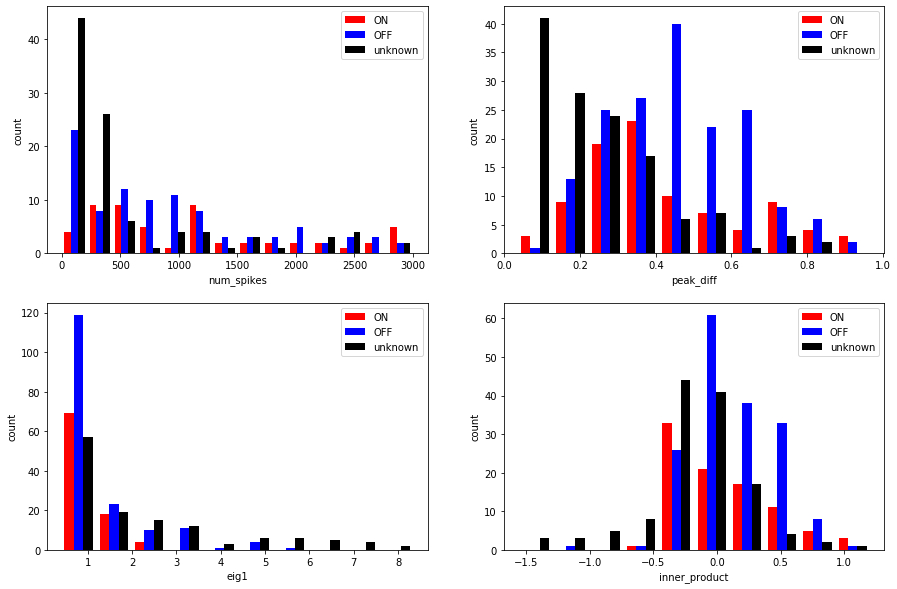

In [11]:
# check stats
plt.figure(figsize=(15,10))
plt.subplot(221)

pysta.plot_hist_by_cell_type(cluster, "num_spikes", bins=np.linspace(0,3000,15))
plt.subplot(222)
pysta.plot_hist_by_cell_type(cluster, "peak_diff")
# pysta.plot_hist_by_cell_type(cluster, "PSNR")
plt.subplot(223)
pysta.plot_hist_by_cell_type(cluster, "eig1")
plt.subplot(224)
pysta.plot_hist_by_cell_type(cluster, "inner_product")

plt.savefig("figure/combined_cluster_dim{}_stat.pdf".format(cluster_dim))
plt.savefig("figure/combined_cluster_dim{}_stat.png".format( cluster_dim))

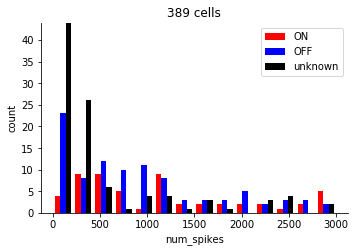

In [12]:
# num spikes histogram

plt.figure(figsize=(5.5,3.5))

pysta.plot_hist_by_cell_type(cluster, "num_spikes", bins=np.linspace(0,3000,15))
plt.title("{} cells".format(len(cluster)))

plt.legend()

# remove top & right box
# https://stackoverflow.com/a/28720127
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# remove margin on the axes
# https://stackoverflow.com/a/42045987
#ax.margins(x=0, y=0)
ax.margins(y=0)

plt.savefig("figure/combined_cluster_dim{}_num_spikes.pdf".format(cluster_dim))
plt.savefig("figure/combined_cluster_dim{}_num_spikes.png".format(cluster_dim))

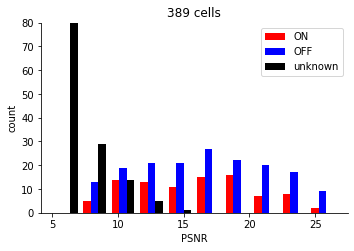

In [13]:
# PSNR histogram

plt.figure(figsize=(5.5,3.5))

pysta.plot_hist_by_cell_type(cluster,  "PSNR")
plt.title("{} cells".format(len(cluster)))

plt.legend()

# remove top & right box
# https://stackoverflow.com/a/28720127
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# remove margin on the axes
# https://stackoverflow.com/a/42045987
#ax.margins(x=0, y=0)
ax.margins(y=0)

plt.savefig("figure/combined_cluster_dim{}_PSNR.pdf".format(cluster_dim))
plt.savefig("figure/combined_cluster_dim{}_PSNR.png".format(cluster_dim))

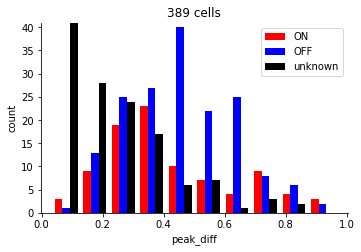

In [14]:
# PSNR histogram

plt.figure(figsize=(5.5,3.5))

pysta.plot_hist_by_cell_type(cluster,  "peak_diff")
plt.title("{} cells".format(len(cluster)))

plt.legend()

# remove top & right box
# https://stackoverflow.com/a/28720127
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# remove margin on the axes
# https://stackoverflow.com/a/42045987
#ax.margins(x=0, y=0)
ax.margins(y=0)

plt.savefig("figure/combined_cluster_dim{}_PSNR.pdf".format(cluster_dim))
plt.savefig("figure/combined_cluster_dim{}_PSNR.png".format(cluster_dim))

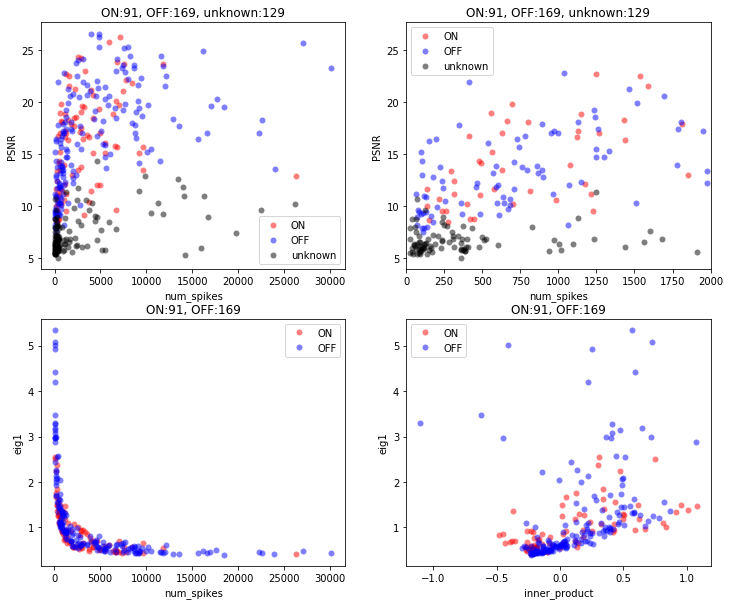

In [15]:
def plot_scatter(cluster):
    plt.figure(figsize=(12,10))
    plt.subplot(221)
    pysta.plot_scatter_by_group(cluster, ["num_spikes", "PSNR"], 
                                "cell_type", ["ON", "OFF", "unknown"], ["r","b",'k'])
#                                 "cell_type", ["ON", "OFF"], ["r","b"])

    plt.subplot(222)
    pysta.plot_scatter_by_group(cluster, ["num_spikes", "PSNR"], 
                                "cell_type", ["ON", "OFF", "unknown"], ["r","b",'k'])                                
#                                 "cell_type", ["ON", "OFF"], ["r","b"])
    plt.xlim(0,2000)
    
    plt.subplot(223)
    pysta.plot_scatter_by_group(cluster, ["num_spikes", "eig1"], 
                                "cell_type", ["ON", "OFF"], ["r","b"])
#     plt.xscale('log')
#     plt.yscale('log')

    plt.subplot(224)
    pysta.plot_scatter_by_group(cluster, ["inner_product", "eig1"], 
                                "cell_type", ["ON", "OFF"])
    
    
def plot_compare_scatter_(cluster):
    plt.subplot(233)
    pysta.plot_scatter_by_group(cluster, ["num_spikes", "inner_product"], ["ON", "OFF"])
    plt.xscale('log')
    # plt.yscale('log')

    plt.subplot(234)
    pysta.plot_scatter_by_goup(cluster, ["PSNR", "PSNR1"], ["ON", "OFF"])
    plt.plot([7.5,25], [7.5,25], 'k--')

    plt.subplot(235)
    pysta.plot_scatter_by_group(cluster, ["PSNR", "PSNR2"], ["ON", "OFF"])
    plt.plot([7.5,25], [7.5,25], 'k--')

plot_scatter(cluster)

plt.savefig("figure/combined_cluster_dim{}_PSNR_eig1.pdf".format(cluster_dim))
plt.savefig("figure/combined_cluster_dim{}_PSNR_eig1".format( cluster_dim))


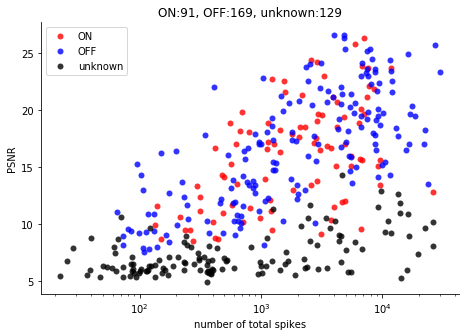

In [16]:
plt.figure(figsize=(7.5,5)) # larger
# plt.figure(figsize=(5,3.5))
pysta.plot_scatter_by_group(cluster, ["num_spikes", "PSNR"], 
                            "cell_type", ["ON", "OFF", "unknown"], ["r","b",'k'], alpha=0.8)
#                                 "cell_type", ["ON", "OFF"], ["r","b"])
plt.xscale('log')
plt.xlabel('number of total spikes')
# remove top & right box
# https://stackoverflow.com/a/28720127
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



plt.savefig("figure/combined_cluster_dim{}_num_spikes_vs_PSNR_large.pdf".format(cluster_dim))
plt.savefig("figure/combined_cluster_dim{}_num_spikes_vs_PSNR_large.png".format(cluster_dim))

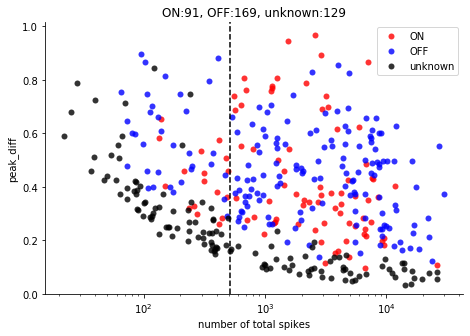

In [25]:
plt.figure(figsize=(7.5,5)) # larger
# plt.figure(figsize=(5,3.5))
pysta.plot_scatter_by_group(cluster, ["num_spikes", "peak_diff"], 
                            "cell_type", ["ON", "OFF", "unknown"], ["r","b",'k'], alpha=0.8)
#                                 "cell_type", ["ON", "OFF"], ["r","b"])
plt.xscale('log')
plt.xlabel('number of total spikes')
# remove top & right box
# https://stackoverflow.com/a/28720127
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

YLIM = list(plt.ylim())
YLIM[0] = 0
plt.ylim(YLIM)
plt.plot([512,512], YLIM, 'k--')

plt.savefig("figure/combined_cluster_dim{}_num_spikes_vs_peak_diff_large.pdf".format(cluster_dim))
plt.savefig("figure/combined_cluster_dim{}_num_spikes_vs_peak_diff_large.png".format(cluster_dim))

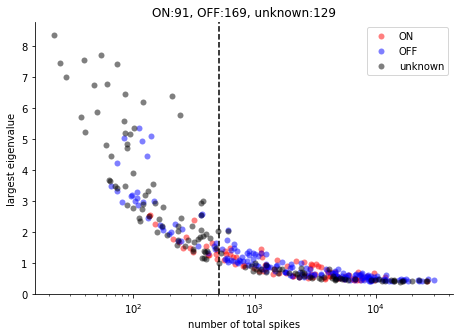

In [18]:
# pysta.plot_scatter_by_group(cluster, ["num_spikes", "eig1"], 
#                             "cell_type", ["ON", "OFF", "unknown"], ["r","b",'k'],
# #                             "cell_type", ["ON", "OFF"], ["r","b"],
#                             alpha=0.5)
plt.figure(figsize=(7.5,5)) # larger
# plt.figure(figsize=(5,3.5))
# plt.scatter(cluster["num_spikes"], cluster["eig1"], c='k', alpha=0.3)
pysta.plot_scatter_by_group(cluster, ["num_spikes", "eig1"], 
                            "cell_type", ["ON", "OFF","unknown"], ["r","b","k"],
#                                 "cell_type", ["ON", "OFF"], ["r","b"])
                            alpha=0.5)

YLIM = plt.ylim()
# YLIM = [0, YLIM[1]]

plt.plot([512,512], YLIM, 'k--')
# plt.plot([512*4,512*4], YLIM, 'b--')
# plt.plot([512*5,512*5], YLIM, 'b--')

plt.xscale('log')
# plt.yscale('log')
plt.xlabel('number of total spikes')
plt.ylabel('largest eigenvalue')

# remove top & right box
# https://stackoverflow.com/a/28720127
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# remove margin on the axes
# https://stackoverflow.com/a/42045987
#ax.margins(x=0, y=0)
ax.margins(y=0)

plt.savefig("figure/combined_cluster_dim{}_num_spikes_vs_eig1_large.pdf".format(cluster_dim))
plt.savefig("figure/combined_cluster_dim{}_num_spikes_vs_eig1_large.png".format(cluster_dim))

## select channels with enough spikes

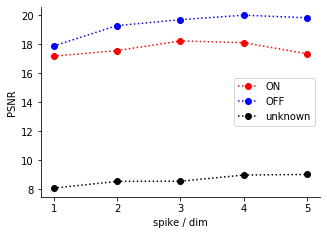

In [19]:
# consider different threshold

spike_per_dims = [1, 2, 3, 4, 5]
# col_name = "counts"
# col_name = "ratios"
col_name = "PSNR"
# col_name = "eig1"
    
mean_values = list()
for spike_per_dim in spike_per_dims:
    idx_enough_spikes = cluster["num_spikes"]>512*spike_per_dim
    cluster_with_enough_spikes = cluster.loc[idx_enough_spikes]

    
#     print("spike / dim=", spike_per_dim)
#     print("total = ", len(cluster_with_enough_spikes))
    
    counts = cluster_with_enough_spikes["cell_type"].value_counts()[["ON", "OFF", "unknown"]]
    ratios = counts / len(cluster_with_enough_spikes)
#     print(counts)
#     print(ratios)

    if col_name == "counts":
        val = np.array(counts)
    elif col_name == "ratios":
        val = np.array(ratios)        
    else:
    #     val =cluster_with_enough_spikes.groupby("cell_type").mean()[col_name].loc[["ON", "OFF", "unknown"]] # keep the index
        val =cluster_with_enough_spikes.groupby("cell_type").median()[col_name].loc[["ON", "OFF", "unknown"]] # keep the index    
                                #cluster_with_enough_spikes.groupby("cell_type").mean().loc[["ON", "OFF", "unknown"]].reset_index()["PSNR"]
        val = np.array(val)
    
    mean_values.append(val)
    
#     plt.plot(spike_per_dim, "PSNR=",mean_PSNRs[0])
mean_values = np.array(mean_values)


plt.figure(figsize=(5,3.5))
plt.plot(spike_per_dims, mean_values[:,0], 'or:')
plt.plot(spike_per_dims, mean_values[:,1], 'ob:')
plt.plot(spike_per_dims, mean_values[:,2], 'ok:')
plt.legend(["ON", "OFF", "unknown"])

plt.ylabel(col_name)
plt.xlabel("spike / dim")
plt.xticks(spike_per_dims)

# remove top & right box
# https://stackoverflow.com/a/28720127
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.savefig("figure/combined_cluster_dim{}_spike_per_dim_vs_{}.pdf".format(cluster_dim, col_name))

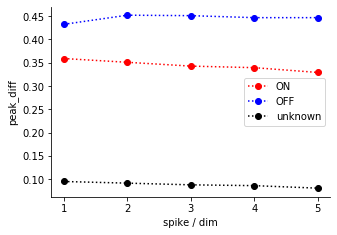

In [20]:
# consider different threshold

spike_per_dims = [1, 2, 3, 4, 5]
col_name = "peak_diff"
    
mean_values = list()
for spike_per_dim in spike_per_dims:
    idx_enough_spikes = cluster["num_spikes"]>512*spike_per_dim
    cluster_with_enough_spikes = cluster.loc[idx_enough_spikes]

    
#     print("spike / dim=", spike_per_dim)
#     print("total = ", len(cluster_with_enough_spikes))
    
    counts = cluster_with_enough_spikes["cell_type"].value_counts()[["ON", "OFF", "unknown"]]
    ratios = counts / len(cluster_with_enough_spikes)
#     print(counts)
#     print(ratios)

    if col_name == "counts":
        val = np.array(counts)
    elif col_name == "ratios":
        val = np.array(ratios)        
    else:
    #     val =cluster_with_enough_spikes.groupby("cell_type").mean()[col_name].loc[["ON", "OFF", "unknown"]] # keep the index
        val =cluster_with_enough_spikes.groupby("cell_type").median()[col_name].loc[["ON", "OFF", "unknown"]] # keep the index    
                                #cluster_with_enough_spikes.groupby("cell_type").mean().loc[["ON", "OFF", "unknown"]].reset_index()["PSNR"]
        val = np.array(val)
    
    mean_values.append(val)
    
#     plt.plot(spike_per_dim, "PSNR=",mean_PSNRs[0])
mean_values = np.array(mean_values)


plt.figure(figsize=(5,3.5))
plt.plot(spike_per_dims, mean_values[:,0], 'or:')
plt.plot(spike_per_dims, mean_values[:,1], 'ob:')
plt.plot(spike_per_dims, mean_values[:,2], 'ok:')
plt.legend(["ON", "OFF", "unknown"])

plt.ylabel(col_name)
plt.xlabel("spike / dim")
plt.xticks(spike_per_dims)

# remove top & right box
# https://stackoverflow.com/a/28720127
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.savefig("figure/combined_cluster_dim{}_spike_per_dim_vs_{}.pdf".format(cluster_dim, col_name))

In [12]:
# with enough spikes
# spike_per_dim = 1 # hyper parameter that I get to choose
# spike_per_dim = 2 # hyper parameter that I get to choose
# spike_per_dim = 3 # hyper parameter that I get to choose
spike_per_dim = 4 # hyper parameter that I get to choose
# spike_per_dim = 5 # hyper parameter that I get to choose

idx_enough_spikes = cluster["num_spikes"]>512*spike_per_dim
cluster_with_enough_spikes = cluster.loc[idx_enough_spikes]

print("total = ", len(cluster_with_enough_spikes))
print(cluster_with_enough_spikes["cell_type"].value_counts()[["ON", "OFF", "unknown"]])
print(cluster_with_enough_spikes["cell_type"].value_counts()[["ON", "OFF", "unknown"]] / len(cluster_with_enough_spikes))


total =  171
ON         48
OFF        84
unknown    39
Name: cell_type, dtype: int64
ON         0.280702
OFF        0.491228
unknown    0.228070
Name: cell_type, dtype: float64


In [13]:
cluster_with_enough_spikes

,channel_name,num_spikes,cell_type,PSNR,eig1,eig2,eig3,converged,PSNR1,PSNR2,weight1,weight2,inner_product,dataset
7,14a,5973,ON,25.775064,0.620785,0.571746,0.562778,True,25.702134,15.884281,0.598530,0.401470,-0.206751,20180618
9,17a,5929,unknown,8.452868,0.436700,0.434049,0.430598,True,6.269053,5.988208,0.504045,0.495955,-0.251180,20180618
10,17b,2553,unknown,8.515376,0.570595,0.559954,0.552507,True,5.333542,5.551068,0.495539,0.504461,-0.268871,20180618
21,23a,12115,OFF,22.562123,0.604328,0.517577,0.516272,True,20.522708,11.367329,0.602274,0.397726,-0.002242,20180618
22,23b,4619,ON,11.990694,0.700543,0.608037,0.595794,True,17.952531,17.924992,0.526349,0.473651,-0.357312,20180618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,82b,2842,OFF,15.507029,0.798825,0.714066,0.700224,True,14.167554,5.978526,0.597454,0.402546,-0.185087,20180626
144,83a,17646,OFF,20.351671,0.493440,0.462766,0.458015,True,6.770738,17.624590,0.493222,0.506778,-0.096240,20180626
149,86a,3186,ON,19.576154,0.952703,0.766365,0.749286,True,9.892318,19.695189,0.276750,0.723250,0.588351,20180626
153,87a,9120,OFF,21.676952,0.590420,0.517161,0.512286,True,19.043271,14.230278,0.600327,0.399673,0.056832,20180626


In [14]:
cluster.groupby("cell_type").mean()

,num_spikes,PSNR,eig1,eig2,eig3,converged,PSNR1,PSNR2,weight1,weight2,inner_product
cell_type,,,,,,,,,,,
OFF,4555.485207,16.585761,1.177086,1.092602,1.045497,True,12.405428,10.314392,0.561508,0.438492,0.119448
ON,3263.219780,16.092398,0.931845,0.868955,0.839521,True,12.794743,10.525676,0.544275,0.455725,0.064662
unknown,2894.542636,7.353616,2.256193,2.006904,1.901224,True,6.393611,6.232177,0.508012,0.491988,-0.164181


In [15]:
cluster_with_enough_spikes.groupby("cell_type").mean()

,num_spikes,PSNR,eig1,eig2,eig3,converged,PSNR1,PSNR2,weight1,weight2,inner_product
cell_type,,,,,,,,,,,
OFF,8434.559524,19.986749,0.560809,0.527865,0.520567,True,14.897485,11.797414,0.537681,0.462319,-0.075664
ON,5491.687500,17.945806,0.618215,0.564730,0.555775,True,14.665386,11.541604,0.530580,0.469420,-0.141051
unknown,8718.897436,8.955758,0.508999,0.494311,0.487535,True,7.636257,7.626497,0.496000,0.504000,-0.237186


In [16]:
cluster_with_enough_spikes.groupby("cell_type").median()

,num_spikes,PSNR,eig1,eig2,eig3,converged,PSNR1,PSNR2,weight1,weight2,inner_product
cell_type,,,,,,,,,,,
OFF,7356.5,20.002697,0.546169,0.517231,0.509077,True,15.495882,11.375428,0.529477,0.470523,-0.097653
ON,4413.5,18.103037,0.567662,0.547633,0.539942,True,13.555439,10.307914,0.524311,0.475689,-0.201906
unknown,5207.0,8.960171,0.482386,0.475528,0.473101,True,6.601859,6.125527,0.498022,0.501978,-0.244086


In [17]:
cluster_with_enough_spikes.groupby("cell_type").min()

,channel_name,num_spikes,PSNR,eig1,eig2,eig3,converged,PSNR1,PSNR2,weight1,weight2,inner_product,dataset
cell_type,,,,,,,,,,,,,
OFF,12a,2050,10.083432,0.401645,0.396776,0.395415,True,6.426467,5.589868,0.368214,0.294814,-0.303349,20180618
ON,12a,2063,9.174551,0.415783,0.410357,0.404642,True,5.787762,5.734993,0.276750,0.150006,-0.479533,20180618
unknown,13b,2148,5.290355,0.396756,0.395866,0.390809,True,5.029023,5.415625,0.380812,0.386794,-0.555696,20180618


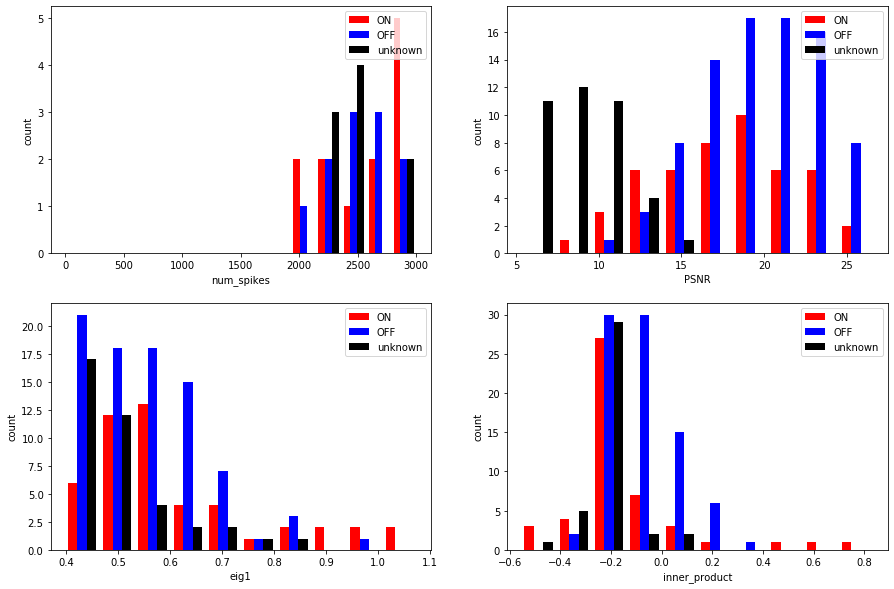

In [18]:
# check stats
plt.figure(figsize=(15,10))
plt.subplot(221)
pysta.plot_hist_by_cell_type(cluster_with_enough_spikes, "num_spikes", bins=np.linspace(0,3000,15))
plt.subplot(222)
pysta.plot_hist_by_cell_type(cluster_with_enough_spikes, "PSNR")
plt.subplot(223)
pysta.plot_hist_by_cell_type(cluster_with_enough_spikes, "eig1")
plt.subplot(224)
pysta.plot_hist_by_cell_type(cluster_with_enough_spikes, "inner_product")

plt.savefig("figure/combined_cluster_dim{}_spd{}_enough_spikes_stat.pdf".format(cluster_dim,spike_per_dim))
plt.savefig("figure/combined_cluster_dim{}_spd{}_enough_spikes_stat.png".format(cluster_dim,spike_per_dim))

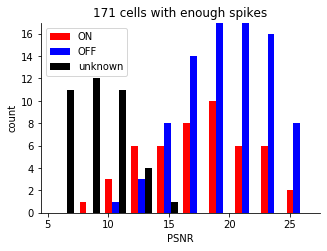

In [19]:
plt.figure(figsize=(5,3.5))

pysta.plot_hist_by_cell_type(cluster_with_enough_spikes,  "PSNR")
plt.title("{} cells with enough spikes".format(len(cluster_with_enough_spikes)))

plt.legend()

# remove top & right box
# https://stackoverflow.com/a/28720127
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# remove margin on the axes
# https://stackoverflow.com/a/42045987
#ax.margins(x=0, y=0)
ax.margins(y=0)

plt.savefig("figure/combined_cluster_dim{}_spd{}_enough_spikes_PSNR.pdf".format(cluster_dim,spike_per_dim))
plt.savefig("figure/combined_cluster_dim{}_spd{}_enough_spikes_PSNR.png".format(cluster_dim,spike_per_dim))

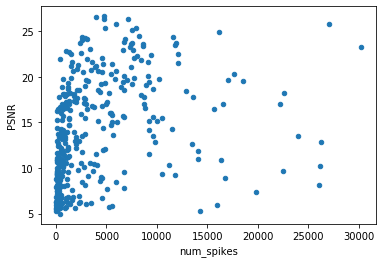

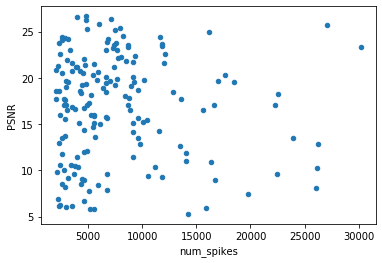

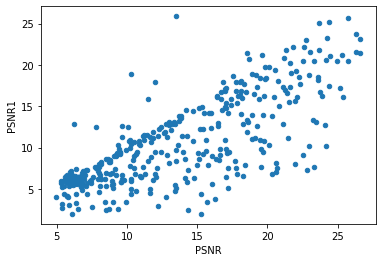

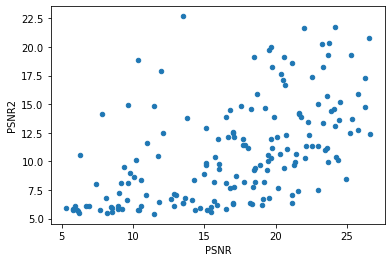

In [20]:
cluster.plot.scatter("num_spikes", "PSNR")
cluster_with_enough_spikes.plot.scatter("num_spikes", "PSNR")

cluster.plot.scatter("PSNR", "PSNR1")
cluster_with_enough_spikes.plot.scatter("PSNR", "PSNR2")


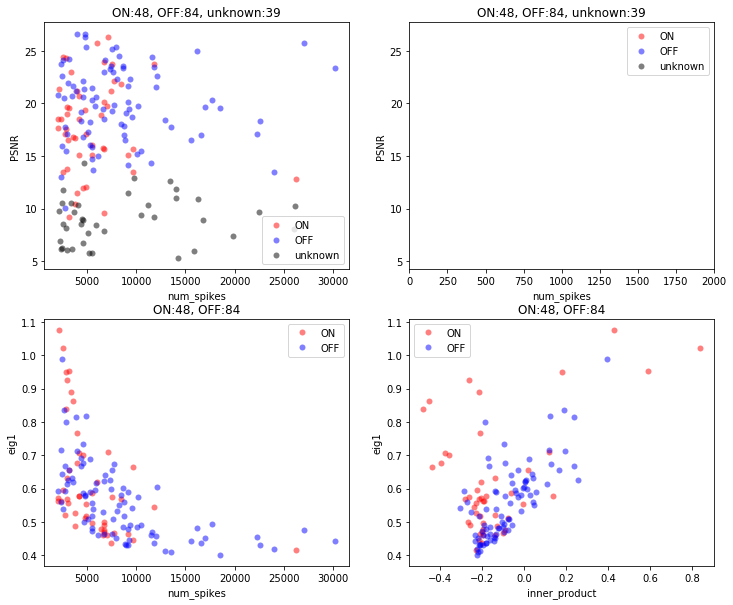

In [21]:
plot_scatter(cluster_with_enough_spikes)

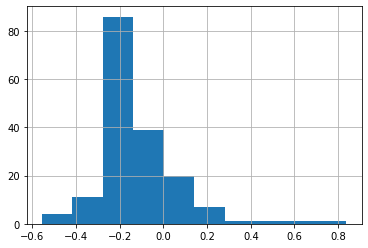

In [22]:
cluster_with_enough_spikes["inner_product"].hist()

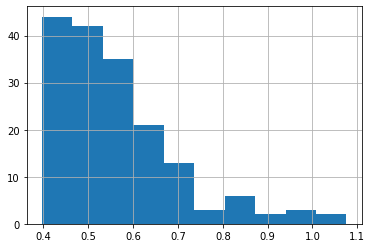

In [23]:
cluster_with_enough_spikes["eig1"].hist()

In [24]:
# idx_on = cluster_with_enough_spikes["cell_type"] == "ON"
# idx_off = cluster_with_enough_spikes["cell_type"] == "OFF"
# idx_unknown = cluster_with_enough_spikes["cell_type"] == "unknown"

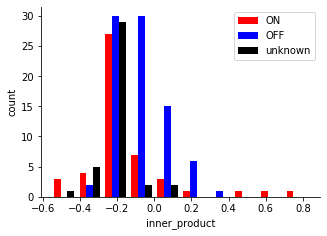

In [25]:
plt.figure(figsize=(5,3.5))

pysta.plot_hist_by_cell_type(cluster_with_enough_spikes, "inner_product")

# remove top & right box
# https://stackoverflow.com/a/28720127
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('figure/combined_cluster_dim{}_spd{}_inner_product_hist.pdf'.format(cluster_dim,spike_per_dim))
plt.savefig('figure/combined_cluster_dim{}_spd{}_inner_product_hist.png'.format(cluster_dim,spike_per_dim))

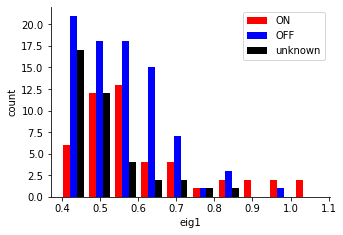

In [26]:
plt.figure(figsize=(5,3.5))

pysta.plot_hist_by_cell_type(cluster_with_enough_spikes, "eig1")

# remove top & right box
# https://stackoverflow.com/a/28720127
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('figure/combined_cluster_dim{}_spd{}_eig1_hist.pdf'.format(cluster_dim,spike_per_dim))
plt.savefig('figure/combined_cluster_dim{}_spd{}_eig1_hist.png'.format(cluster_dim,spike_per_dim))

Text(0, 0.5, '1st eigenvalue')

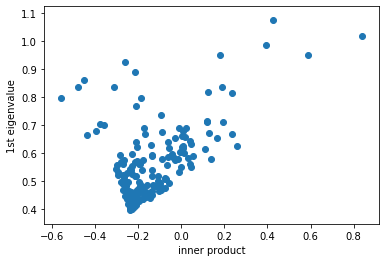

In [27]:
plt.scatter(cluster_with_enough_spikes["inner_product"], cluster_with_enough_spikes["eig1"])
plt.xlabel('inner product')
plt.ylabel('1st eigenvalue')

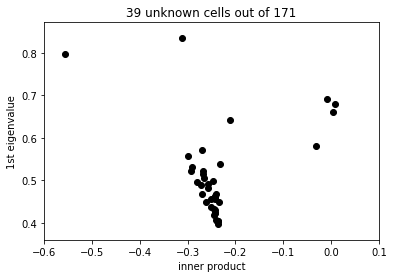

In [28]:
idx_unknown = cluster_with_enough_spikes["cell_type"] == "unknown"

plt.scatter(cluster_with_enough_spikes.loc[idx_unknown,"inner_product"], cluster_with_enough_spikes.loc[idx_unknown,"eig1"], c="k")
plt.xlabel('inner product')
plt.ylabel('1st eigenvalue')

plt.xticks([-0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1])
plt.title ("{} unknown cells out of {}".format(np.sum(idx_unknown),len(cluster_with_enough_spikes)))
plt.savefig('figure/combined_cluster_dim{}_spd{}_inner_product_vs_eig1_unknown.pdf'.format(cluster_dim,spike_per_dim))
plt.savefig('figure/combined_cluster_dim{}_spd{}_inner_product_vs_eig1_unknown.png'.format(cluster_dim,spike_per_dim))

171
OFF        84
ON         48
unknown    39
Name: cell_type, dtype: int64
OFF        0.491228
ON         0.280702
unknown    0.228070
Name: cell_type, dtype: float64


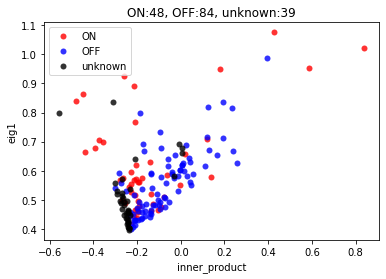

In [29]:
# def plot_inner_product_vs_eig1(cluster):
#     idx_on = cluster["cell_type"] == "ON"
#     idx_off = cluster["cell_type"] == "OFF"
#     idx_unknown = cluster["cell_type"] == "unknown"

#     plt.scatter(cluster.loc[idx_on,"inner_product"], cluster.loc[idx_on,"eig1"], c="r")
#     plt.scatter(cluster.loc[idx_off,"inner_product"], cluster.loc[idx_off,"eig1"], c="b")
#     plt.scatter(cluster.loc[idx_unknown,"inner_product"], cluster.loc[idx_unknown,"eig1"], c="k")
#     plt.xlabel('inner product')
#     plt.ylabel('1st eigenvalue')

#     plt.title ("ON:{}, OFF:{}, unknown:{}".format(np.sum(idx_on),np.sum(idx_off),np.sum(idx_unknown)))

#     plt.legend(["ON", "OFF", "unknown"])
    

print(len(cluster_with_enough_spikes))
print(cluster_with_enough_spikes["cell_type"].value_counts())
print(cluster_with_enough_spikes["cell_type"].value_counts()/len(cluster_with_enough_spikes))



pysta.plot_scatter_by_group(cluster_with_enough_spikes, ["inner_product", "eig1"], alpha=0.8)
# plt.xticks([-0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1])

plt.savefig('figure/combined_cluster_with_enough_spikes_dim{}_spd{}_inner_product_vs_eig1.pdf'.format(cluster_dim,spike_per_dim))
plt.savefig('figure/combined_cluster_with_enough_spikes_dim{}_spd{}_inner_product_vs_eig1.png'.format(cluster_dim,spike_per_dim))




171
OFF        84
ON         48
unknown    39
Name: cell_type, dtype: int64
OFF        0.491228
ON         0.280702
unknown    0.228070
Name: cell_type, dtype: float64


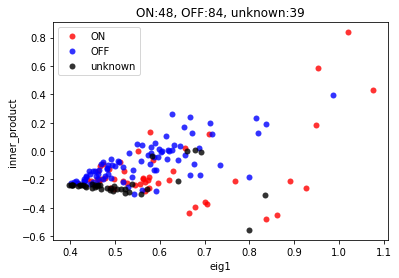

In [30]:
print(len(cluster_with_enough_spikes))
print(cluster_with_enough_spikes["cell_type"].value_counts())
print(cluster_with_enough_spikes["cell_type"].value_counts()/len(cluster_with_enough_spikes))



pysta.plot_scatter_by_group(cluster_with_enough_spikes, ["eig1", "inner_product"], alpha=0.8)
# plt.xticks([-0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1])

plt.savefig('figure/combined_cluster_with_enough_spikes_dim{}_spd{}_eig1_vs_inner_product.pdf'.format(cluster_dim,spike_per_dim))
plt.savefig('figure/combined_cluster_with_enough_spikes_dim{}_spd{}_eig1_vs_inner_product.png'.format(cluster_dim,spike_per_dim))



In [31]:
# cluster_with_enough_spikes.sort_values('eig1', ascending=False).head(30)

In [32]:
cluster_with_enough_spikes.sort_values('inner_product').head(30)#.sort_values("dataset")
# cluster_with_enough_samples.sort_values(['dataset','inner_product'])

,channel_name,num_spikes,cell_type,PSNR,eig1,eig2,eig3,converged,PSNR1,PSNR2,weight1,weight2,inner_product,dataset
64,36c,4098,unknown,10.318830,0.798256,0.620102,0.613533,True,18.892517,18.855896,0.524121,0.475879,-0.555696,20180626
24,22a,2860,ON,17.556724,0.838246,0.704459,0.671715,True,18.716530,14.826105,0.647365,0.352635,-0.479533,20180626
38,32b,3530,ON,16.838700,0.862429,0.749463,0.716215,True,17.936124,14.497231,0.647646,0.352354,-0.449921,20180618
44,35a,9638,ON,13.477084,0.665520,0.552200,0.548982,True,25.869758,22.670575,0.553304,0.446696,-0.437553,20180618
109,85b,4002,ON,11.494061,0.678136,0.597015,0.581718,True,15.846811,14.866739,0.515823,0.484177,-0.394200,20180621
43,34b,4208,ON,18.520772,0.706069,0.597161,0.588002,True,21.493398,19.136803,0.566473,0.433527,-0.375909,20180618
22,23b,4619,ON,11.990694,0.700543,0.608037,0.595794,True,17.952531,17.924992,0.526349,0.473651,-0.357312,20180618
25,22b,2413,unknown,6.267735,0.835159,0.782430,0.732217,True,12.865903,10.592013,0.380812,0.619188,-0.312358,20180626
67,37b,9568,OFF,18.715314,0.542621,0.476537,0.469468,True,20.694819,15.913280,0.518498,0.481502,-0.303349,20180626
65,46b,2306,unknown,6.176081,0.558057,0.554718,0.549498,True,6.285212,5.462719,0.509944,0.490056,-0.298996,20180618


## threshold by PSNRs & sort by inner product

In [33]:
PSNR_threshold = 8.5
idx_thresholded = (cluster_with_enough_spikes["inner_product"] < 0) & (cluster_with_enough_spikes["PSNR1"] > PSNR_threshold) & (cluster_with_enough_spikes["PSNR2"] > PSNR_threshold)
cluster_thresholded = cluster_with_enough_spikes.loc[idx_thresholded].sort_values('inner_product')

print(len(cluster_thresholded))
cluster_thresholded

61


,channel_name,num_spikes,cell_type,PSNR,eig1,eig2,eig3,converged,PSNR1,PSNR2,weight1,weight2,inner_product,dataset
64,36c,4098,unknown,10.318830,0.798256,0.620102,0.613533,True,18.892517,18.855896,0.524121,0.475879,-0.555696,20180626
24,22a,2860,ON,17.556724,0.838246,0.704459,0.671715,True,18.716530,14.826105,0.647365,0.352635,-0.479533,20180626
38,32b,3530,ON,16.838700,0.862429,0.749463,0.716215,True,17.936124,14.497231,0.647646,0.352354,-0.449921,20180618
44,35a,9638,ON,13.477084,0.665520,0.552200,0.548982,True,25.869758,22.670575,0.553304,0.446696,-0.437553,20180618
109,85b,4002,ON,11.494061,0.678136,0.597015,0.581718,True,15.846811,14.866739,0.515823,0.484177,-0.394200,20180621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,21a,3114,OFF,24.182765,0.655560,0.625129,0.608992,True,20.556893,13.068052,0.612136,0.387864,-0.028613,20180626
24,24b,4795,OFF,26.300102,0.580599,0.572773,0.567813,True,21.554035,14.774093,0.608840,0.391160,-0.013308,20180618
106,61a,8017,OFF,22.265948,0.531427,0.494167,0.482321,True,18.590000,13.462127,0.585662,0.414338,-0.012381,20180626
87,64b,8643,OFF,23.344654,0.602733,0.542088,0.536521,True,20.518699,13.344694,0.550941,0.449059,-0.004678,20180618


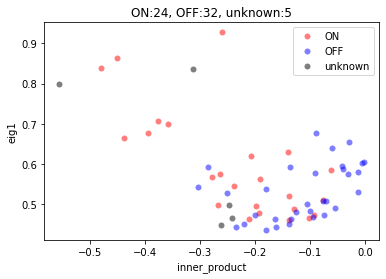

In [34]:
pysta.plot_scatter_by_group(cluster_thresholded, ["inner_product", "eig1"])
plt.savefig('figure/cluster_thresholded_inner_product_vs_eig1_dim{}_spd{}.pdf'.format(cluster_dim,spike_per_dim))
plt.savefig('figure/cluster_thresholded_inner_product_vs_eig1_dim{}_spd{}.png'.format(cluster_dim,spike_per_dim))

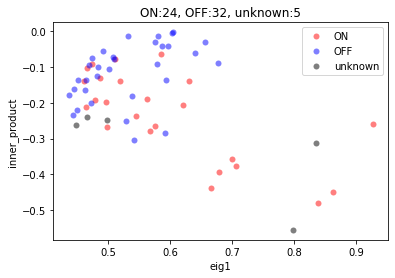

In [35]:
pysta.plot_scatter_by_group(cluster_thresholded, ["eig1", "inner_product"])
plt.savefig('figure/cluster_thresholded_eig1_vs_inner_product_dim{}_spd{}.pdf'.format(cluster_dim,spike_per_dim))
plt.savefig('figure/cluster_thresholded_eig1_vs_inner_product_dim{}_spd{}.png'.format(cluster_dim,spike_per_dim))

In [36]:
# # plot examples
# stcl.plot_examples(cluster_thresholded, cluster_dim, 
#                    folder_name="cluster_dim{}_spd{}_on_and_off_temp".format(cluster_dim,spike_per_dim),
#                    temporal_profile=True, spatial_profile=False)
# stcl.plot_examples(cluster_thresholded, cluster_dim, 
#                    folder_name="cluster_dim{}_spd{}_on_and_off_spatial".format(cluster_dim,spike_per_dim),
#                    temporal_profile=False, spatial_profile=True)

In [37]:
# sort by inner product and plot
def plot_an_example(series, cluster_dim, temporal_profile=True, spatial_profile=[], filename_prefix=None):
    dataset_name = series["dataset"]
    folder_name = "{}_tap8_cov_classic_cluster_dim{}".format(dataset_name, cluster_dim)
    channel_name = series["channel_name"]
    cell_type = series["cell_type"]
    inner_product = series["inner_product"]

    PSNR = series["PSNR"]        
    PSNR1 = series["PSNR1"]
    PSNR2 = series["PSNR2"]

#     print(i, dataset_name, channel_name, cell_type, inner_product, PSNR1, PSNR2)
    
    if temporal_profile:
        plt.figure(figsize=(20,8))
        im1 = plt.imread(os.path.join(folder_name, "{}_centers.png".format(channel_name)))
        
        plt.imshow(im1)
        plt.box('off')
        plt.axis('off')
        
        plt.title(dataset_name + " " + channel_name + " ({})".format(cell_type))
        if filename_prefix is not None:
            plt.savefig(filename_prefix + "_{}_{}_temporal.png".format(dataset_name,channel_name))
#             print("{}_{}_{}_temporal.png".format(filename,dataset_name,channel_name))

    for group_idx in spatial_profile:
        plt.figure(figsize=(20,8))
        im1 = plt.imread(os.path.join(folder_name, "{}_center_{}.png".format(channel_name,group_idx)))
        
        plt.imshow(im1)
        plt.box('off')
        plt.axis('off')
        
        if filename_prefix is not None:
            plt.savefig(filename_prefix + "_{}_{}_spatial_{}.png".format(dataset_name,channel_name,group_idx))
#             print("{}_{}_{}_spatial_{}.png".format(filename,dataset_name,channel_name,group_idx))

        
def plot_examples(cluster_sorted, cluster_dim, temporal_profile=True, spatial_profile=[], 
                  folder_name=None):            
    for i in range(len(cluster_sorted)):
        
        if folder_name is not None:
            if not os.path.exists(folder_name):
                os.makedirs(folder_name)            
            filename_i = os.path.join(folder_name, "{:02d}".format(i))
        else:
            filename_i = None

        plot_an_example(cluster_sorted.iloc[i], cluster_dim, temporal_profile=temporal_profile, spatial_profile=spatial_profile, filename_prefix=filename_i)
        plt.close()

        
plot_examples(cluster_thresholded, cluster_dim,
              folder_name = "combined_cluster_dim{}_spd{}_sorted_by_inner_product".format(cluster_dim,spike_per_dim))

## manually check using saved temporal profiles

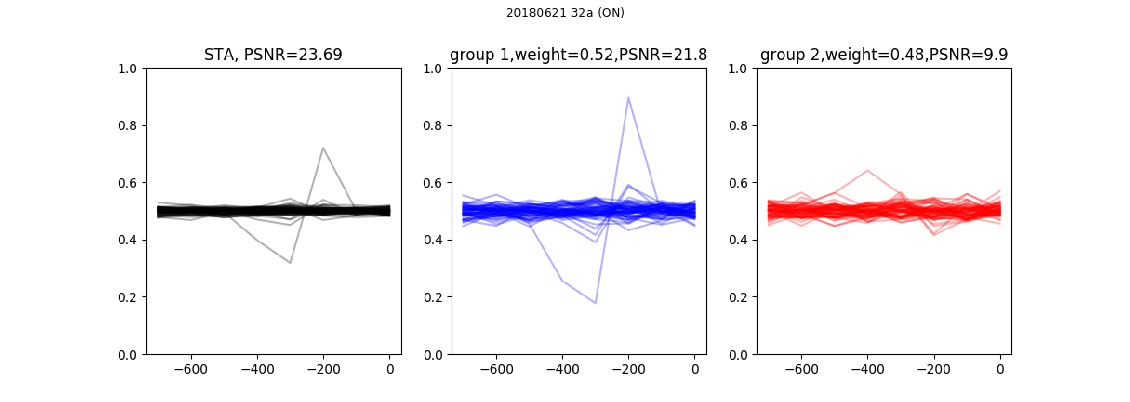

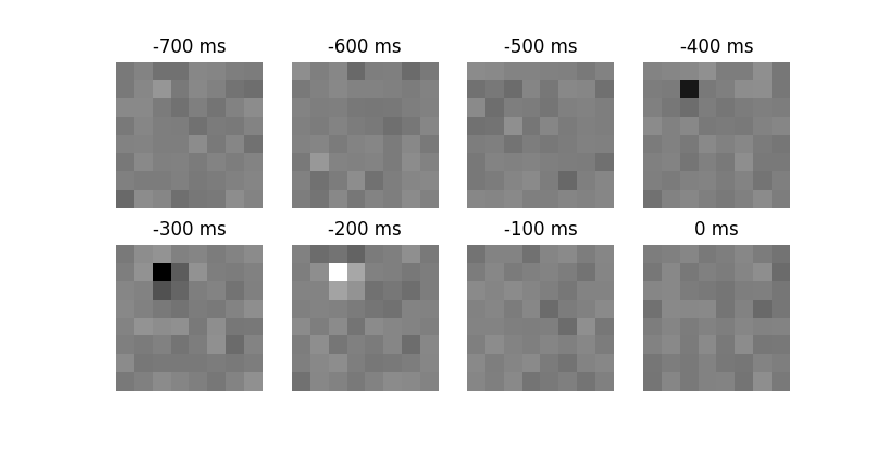

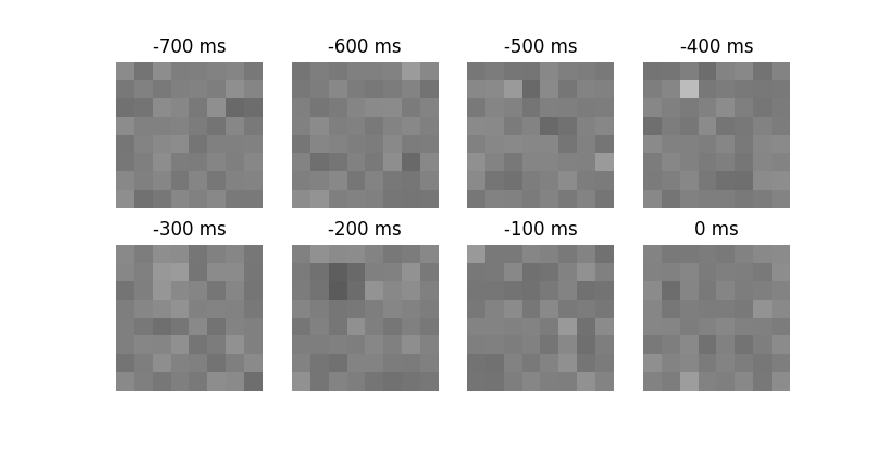

In [38]:
# double check  (dim=2, spd=5)
# plot_an_example(cluster_thresholded.iloc[13], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # OK
# plot_an_example(cluster_thresholded.iloc[14], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # OK
# plot_an_example(cluster_thresholded.iloc[16], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # OK
# plot_an_example(cluster_thresholded.iloc[19], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # OK
# plot_an_example(cluster_thresholded.iloc[21], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # OK
# plot_an_example(cluster_thresholded.iloc[28], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # OK
# plot_an_example(cluster_thresholded.iloc[27], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # OK

# double check  (dim=2, spd=4)
# plot_an_example(cluster_thresholded.iloc[16], dim, temporal_profile=True, spatial_profile=[1, 2])
# plot_an_example(cluster_thresholded.iloc[20], dim, temporal_profile=True, spatial_profile=[1, 2])
# plot_an_example(cluster_thresholded.iloc[22], dim, temporal_profile=True, spatial_profile=[1, 2])
# plot_an_example(cluster_thresholded.iloc[31], cluster_dim, temporal_profile=True, spatial_profile=[1, 2])

# plot_an_example(cluster_thresholded.iloc[17], cluster_dim, temporal_profile=True, spatial_profile=[1, 2])
# plot_an_example(cluster_thresholded.iloc[19], cluster_dim, temporal_profile=True, spatial_profile=[1, 2])
# plot_an_example(cluster_thresholded.iloc[34], cluster_dim, temporal_profile=True, spatial_profile=[1, 2])
# plot_an_example(cluster_thresholded.iloc[25], cluster_dim, temporal_profile=True, spatial_profile=[1, 2])
# plot_an_example(cluster_thresholded.iloc[52], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # does not overlap spatially


# double check  (dim=2, spd=2)
# plot_an_example(cluster_thresholded.iloc[14], cluster_dim, temporal_profile=True, spatial_profile=[1, 2])
plot_an_example(cluster_thresholded.iloc[18], cluster_dim, temporal_profile=True, spatial_profile=[1, 2])
# plot_an_example(cluster_thresholded.iloc[21], cluster_dim, temporal_profile=True, spatial_profile=[1, 2])
# plot_an_example(cluster_thresholded.iloc[32], cluster_dim, temporal_profile=True, spatial_profile=[1, 2])

# double check  (dim=2, spd=2)
# plot_an_example(cluster_thresholded.iloc[14], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # OK
# plot_an_example(cluster_thresholded.iloc[18], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # OK
# plot_an_example(cluster_thresholded.iloc[20], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # No
# plot_an_example(cluster_thresholded.iloc[21], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # Yes
# plot_an_example(cluster_thresholded.iloc[22], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # No
# plot_an_example(cluster_thresholded.iloc[23], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # Yes
# plot_an_example(cluster_thresholded.iloc[34], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # Yes
# plot_an_example(cluster_thresholded.iloc[22], dim, temporal_profile=True, spatial_profile=[1, 2])
# plot_an_example(cluster_thresholded.iloc[31], cluster_dim, temporal_profile=True, spatial_profile=[1, 2])



# double check  (dim=2, spd=1)
# plot_an_example(cluster_thresholded.iloc[14], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # OK
# plot_an_example(cluster_thresholded.iloc[15], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # OK
# plot_an_example(cluster_thresholded.iloc[18], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # OK
# plot_an_example(cluster_thresholded.iloc[20], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # Nope
# plot_an_example(cluster_thresholded.iloc[21], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # OK
# plot_an_example(cluster_thresholded.iloc[22], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # Nope
# plot_an_example(cluster_thresholded.iloc[23], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # OK
# plot_an_example(cluster_thresholded.iloc[34], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # OK
# plot_an_example(cluster_thresholded.iloc[39], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # Nope
# plot_an_example(cluster_thresholded.iloc[43], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # Nope



In [39]:
# manual inspection


if cluster_dim==2:
    if spike_per_dim == 5:
        idx_checked = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 28]
    elif spike_per_dim == 4:
        idx_checked = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 31]
    elif spike_per_dim == 3:
        idx_checked = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
                                 21, 23, 32]
    elif spike_per_dim ==2:
        idx_checked = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                       10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
                       21, 23, 34]
    elif spike_per_dim == 1:
        idx_checked = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                       10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
                       21, 23, 34]
        
elif cluster_dim==3:
    idx_checked = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]
    pass
else:
    pass

cluster_checked = cluster_thresholded.iloc[idx_checked]

cluster_checked.to_csv("on_and_off_dim{}.csv".format(cluster_dim), index=None)

print(len(cluster_checked))

23


In [40]:
# plt.figure(figsize=(7,15))
# plt.subplot(311)
# plot_inner_product_vs_eig1(cluster_with_enough_spikes)
# plt.xlim([-0.6, 0])
# plt.subplot(312)
# plot_inner_product_vs_eig1(cluster_thresholded)
# plt.xlim([-0.6, 0])
# plt.subplot(313)
# plot_inner_product_vs_eig1(cluster_checked)
# plt.xlim([-0.6, 0])

In [41]:
cluster_checked["cell_type_on_and_off"]=True

cluster_checked.to_csv("cluster_dim{}_on_and_off_checked.csv".format(cluster_dim))
cluster_checked

/Users/yyoo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,channel_name,num_spikes,cell_type,PSNR,eig1,eig2,eig3,converged,PSNR1,PSNR2,weight1,weight2,inner_product,dataset,cell_type_on_and_off
64,36c,4098,unknown,10.318830,0.798256,0.620102,0.613533,True,18.892517,18.855896,0.524121,0.475879,-0.555696,20180626,True
24,22a,2860,ON,17.556724,0.838246,0.704459,0.671715,True,18.716530,14.826105,0.647365,0.352635,-0.479533,20180626,True
38,32b,3530,ON,16.838700,0.862429,0.749463,0.716215,True,17.936124,14.497231,0.647646,0.352354,-0.449921,20180618,True
44,35a,9638,ON,13.477084,0.665520,0.552200,0.548982,True,25.869758,22.670575,0.553304,0.446696,-0.437553,20180618,True
109,85b,4002,ON,11.494061,0.678136,0.597015,0.581718,True,15.846811,14.866739,0.515823,0.484177,-0.394200,20180621,True
43,34b,4208,ON,18.520772,0.706069,0.597161,0.588002,True,21.493398,19.136803,0.566473,0.433527,-0.375909,20180618,True
22,23b,4619,ON,11.990694,0.700543,0.608037,0.595794,True,17.952531,17.924992,0.526349,0.473651,-0.357312,20180618,True
25,22b,2413,unknown,6.267735,0.835159,0.782430,0.732217,True,12.865903,10.592013,0.380812,0.619188,-0.312358,20180626,True
67,37b,9568,OFF,18.715314,0.542621,0.476537,0.469468,True,20.694819,15.913280,0.518498,0.481502,-0.303349,20180626,True
86,46b,2762,OFF,10.083432,0.592556,0.580456,0.562291,True,12.540200,8.637063,0.502355,0.497645,-0.284796,20180626,True


In [42]:
## check statistics
cluster_combined = cluster_with_enough_spikes
# cluster_combined["cell_type_clustered"]=cluster_combined["cell_type"]
cluster_combined = cluster_combined.merge(cluster_checked[["dataset", "channel_name","cell_type_on_and_off"]], on=["dataset", "channel_name"], how="outer")

# fill NaN with original cell_type
idx_null = cluster_combined["cell_type_on_and_off"].isnull()
cluster_combined.loc[idx_null, "cell_type_on_and_off"] = False

# combine original cell_type
cluster_combined["cell_type_combined"] = cluster_combined["cell_type"]
cluster_combined.loc[~idx_null,"cell_type_combined"] = "ON/OFF"

cluster_combined


,channel_name,num_spikes,cell_type,PSNR,eig1,eig2,eig3,converged,PSNR1,PSNR2,weight1,weight2,inner_product,dataset,cell_type_on_and_off,cell_type_combined
0,14a,5973,ON,25.775064,0.620785,0.571746,0.562778,True,25.702134,15.884281,0.598530,0.401470,-0.206751,20180618,True,ON/OFF
1,17a,5929,unknown,8.452868,0.436700,0.434049,0.430598,True,6.269053,5.988208,0.504045,0.495955,-0.251180,20180618,False,unknown
2,17b,2553,unknown,8.515376,0.570595,0.559954,0.552507,True,5.333542,5.551068,0.495539,0.504461,-0.268871,20180618,False,unknown
3,23a,12115,OFF,22.562123,0.604328,0.517577,0.516272,True,20.522708,11.367329,0.602274,0.397726,-0.002242,20180618,False,OFF
4,23b,4619,ON,11.990694,0.700543,0.608037,0.595794,True,17.952531,17.924992,0.526349,0.473651,-0.357312,20180618,True,ON/OFF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,82b,2842,OFF,15.507029,0.798825,0.714066,0.700224,True,14.167554,5.978526,0.597454,0.402546,-0.185087,20180626,False,OFF
167,83a,17646,OFF,20.351671,0.493440,0.462766,0.458015,True,6.770738,17.624590,0.493222,0.506778,-0.096240,20180626,False,OFF
168,86a,3186,ON,19.576154,0.952703,0.766365,0.749286,True,9.892318,19.695189,0.276750,0.723250,0.588351,20180626,False,ON
169,87a,9120,OFF,21.676952,0.590420,0.517161,0.512286,True,19.043271,14.230278,0.600327,0.399673,0.056832,20180626,False,OFF


In [43]:
# save to .csv
filename = "cluster_combined_dim{}_spd{}.csv".format(cluster_dim,spike_per_dim)
print(filename)
cluster_combined.to_csv(filename, index=None)

cluster_combined_dim2_spd4.csv


In [44]:
cluster_combined["cell_type_on_and_off"].value_counts()

False    148
True      23
Name: cell_type_on_and_off, dtype: int64

In [45]:
cluster_combined.groupby("cell_type_on_and_off")["cell_type"].value_counts()

cell_type_on_and_off  cell_type
False                 OFF          79
                      ON           35
                      unknown      34
True                  ON           13
                      OFF           5
                      unknown       5
Name: cell_type, dtype: int64

In [46]:
print(cluster_combined["cell_type"].value_counts()[["ON","OFF","unknown"]])
print(cluster_combined["cell_type_combined"].value_counts()[["ON","OFF","ON/OFF","unknown"]])

ON         48
OFF        84
unknown    39
Name: cell_type, dtype: int64
ON         35
OFF        79
ON/OFF     23
unknown    34
Name: cell_type_combined, dtype: int64


In [47]:
print(cluster_combined["cell_type"].value_counts()[["ON","OFF","unknown"]] / len(cluster_combined))
print(cluster_combined["cell_type_combined"].value_counts()[["ON","OFF","ON/OFF","unknown"]] / len(cluster_combined))

ON         0.280702
OFF        0.491228
unknown    0.228070
Name: cell_type, dtype: float64
ON         0.204678
OFF        0.461988
ON/OFF     0.134503
unknown    0.198830
Name: cell_type_combined, dtype: float64


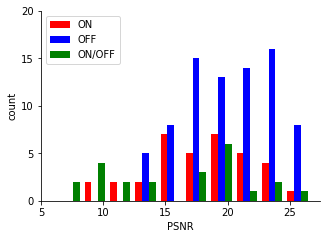

In [48]:
plt.figure(figsize=(5,3.5))

pysta.plot_hist_by_group(cluster_combined, "PSNR", 
                         "cell_type_combined", ["ON", "OFF", "ON/OFF"], group_color=["r", "b", "g"])
#                          "cell_type_combined", ["ON", "OFF", "ON/OFF", "unknown"], group_color=["r", "b", "g", "k"])

# remove top & right box
# https://stackoverflow.com/a/28720127
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# plt.ylim(0,22)
plt.xticks([5, 10, 15, 20, 25])
plt.yticks([0, 5, 10, 15, 20])

plt.legend(loc="upper left")

plt.savefig('figure/cluster_dim{}_spd{}_checked_PSNR_hist.pdf'.format(cluster_dim,spike_per_dim))
plt.savefig('figure/cluster_dim{}_spd{}_checked_PSNR_hist.png'.format(cluster_dim,spike_per_dim))

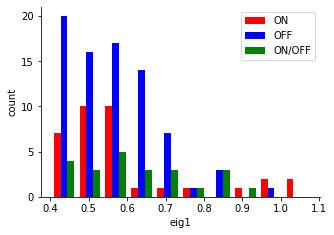

In [49]:
plt.figure(figsize=(5,3.5))

pysta.plot_hist_by_group(cluster_combined, "eig1", 
                         "cell_type_combined", ["ON", "OFF", "ON/OFF"], group_color=["r", "b", "g"])
#                          "cell_type_combined", ["ON", "OFF", "ON/OFF", "unknown"], group_color=["r", "b", "g", "k"])

# remove top & right box
# https://stackoverflow.com/a/28720127
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# plt.ylim(0,22)
plt.yticks([0, 5, 10, 15, 20])

plt.savefig('figure/cluster_dim{}_spd{}_checked_eig1_hist.pdf'.format(cluster_dim,spike_per_dim))
plt.savefig('figure/cluster_dim{}_spd{}_checked_eig1_hist.png'.format(cluster_dim,spike_per_dim))

[-0.6  -0.55 -0.5  -0.45 -0.4  -0.35 -0.3  -0.25 -0.2  -0.15 -0.1  -0.05
  0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55
  0.6   0.65  0.7   0.75  0.8   0.85]


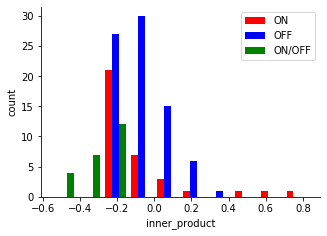

In [50]:
plt.figure(figsize=(5,3.5))

bins = np.linspace(-0.6, 0.85, 29+1)
# bins = np.linspace(-0.6, 0.8, 28+1)
# bins = np.linspace(-0.6, 0.4, 20+1)#15)
# bins = np.linspace(-0.6, 0.3, 18+1)
# bins = np.linspace(-0.5, 0.3, 16+1)
print(bins)
pysta.plot_hist_by_group(cluster_combined, "inner_product", 
                         "cell_type_combined", ["ON", "OFF", "ON/OFF"], group_color=["r", "b", "g"],
#                          "cell_type_combined", ["ON", "OFF", "ON/OFF", "unknown"], group_color=["r", "b", "g", "k"],
                        )
#                          bins=bins)

# remove top & right box
# https://stackoverflow.com/a/28720127
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# plt.yticks([0, 5, 10, 15])

plt.savefig('figure/cluster_dim{}_spd{}_checked_inner_product_hist.pdf'.format(cluster_dim,spike_per_dim))
plt.savefig('figure/cluster_dim{}_spd{}_checked_inner_product_hist.png'.format(cluster_dim,spike_per_dim))


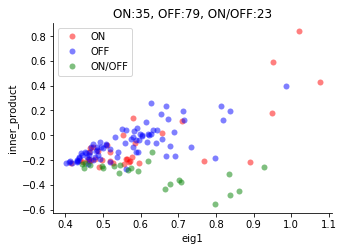

In [51]:
# plot inner_product vs. eig1

# plt.figure(figsize=(8,6))
plt.figure(figsize=(5,3.5))

pysta.plot_scatter_by_group(cluster_combined, ["eig1","inner_product"],
                            "cell_type_combined", ["ON", "OFF", "ON/OFF"], ["r","b","g"], alpha=0.5)                            
#                             "cell_type_combined", ["ON", "OFF", "ON/OFF","unknown"], ["b","r","g","k"]


# plt.xlim(0.3, 1)
# plt.ylim(-0.6, 0.3)

# remove top & right box
# https://stackoverflow.com/a/28720127
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.savefig('figure/cluster_dim{}_spd{}_checked_eig1_vs_inner_product.pdf'.format(cluster_dim,spike_per_dim))
plt.savefig('figure/cluster_dim{}_spd{}_checked_eig1_vs_inner_product.png'.format(cluster_dim,spike_per_dim))

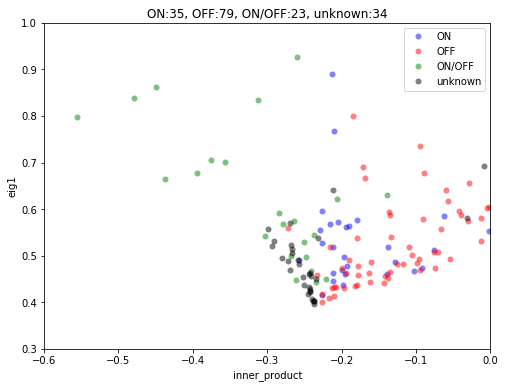

In [52]:
# plot inner_product vs. eig1

plt.figure(figsize=(8,6))
pysta.plot_scatter_by_group(cluster_combined, ["inner_product", "eig1"],
#                             "cell_type_combined", ["ON", "OFF", "ON/OFF"], ["b","r","k"], alpha=1)                            
                            "cell_type_combined", ["ON", "OFF", "ON/OFF","unknown"], ["b","r","g","k"])

plt.xlim(-0.6, 0)
plt.ylim(0.3, 1)

plt.savefig('figure/cluster_checked_inner_product_vs_eig1_dim{}_spd{}.pdf'.format(cluster_dim,spike_per_dim))
plt.savefig('figure/cluster_checked_inner_product_vs_eig1_dim{}_spd{}.png'.format(cluster_dim,spike_per_dim))

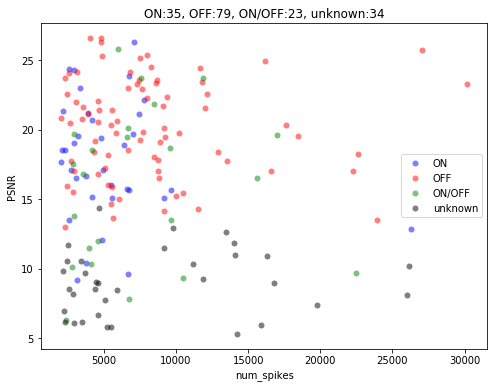

In [53]:
# plot inner_product vs. eig1

plt.figure(figsize=(8,6))
#pysta.plot_scatter_by_group(cluster_combined, ["num_spikes", "eig1"],
pysta.plot_scatter_by_group(cluster_combined, ["num_spikes", "PSNR"],
                            "cell_type_combined", ["ON", "OFF", "ON/OFF","unknown"], ["b","r","g","k"])

# plt.xlim(-0.6, 0)
# plt.ylim(0.3, 1)

# plt.savefig('figure/cluster_checked_inner_product_vs_eig1_dim{}_spd{}.pdf'.format(cluster_dim,spike_per_dim))
# plt.savefig('figure/cluster_checked_inner_product_vs_eig1_dim{}_spd{}.png'.format(cluster_dim,spike_per_dim))

In [54]:
tt = cluster_combined[cluster_combined["inner_product"] < -0.2]
tt = tt[tt["cell_type_combined"]=="OFF"]
tt = tt[tt["eig1"] < 0.6]
tt = tt[tt["eig1"] > 0.55]
tt.sort_values("eig1", ascending=False)
#tt = cluster_combined[cluster_combined["cell_type_combined"]=="OFF"].sort_values("eig1", ascending=False)
#idx_neg = tt["inner_product"] < 0
#tt.loc[idx_neg]

,channel_name,num_spikes,cell_type,PSNR,eig1,eig2,eig3,converged,PSNR1,PSNR2,weight1,weight2,inner_product,dataset,cell_type_on_and_off,cell_type_combined
157,62b,2308,OFF,12.982289,0.559727,0.550488,0.54794,True,8.101284,7.069528,0.503116,0.496884,-0.272045,20180626,False,OFF


-0.6088898359041631

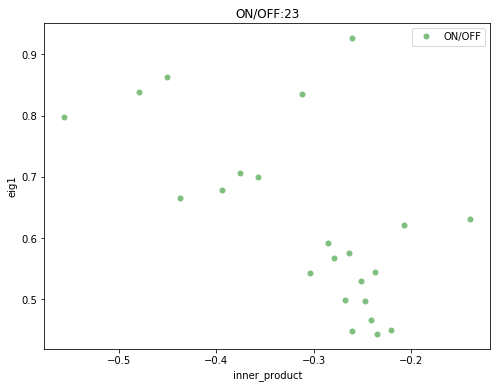

In [55]:
plt.figure(figsize=(8,6))
pysta.plot_scatter_by_group(cluster_combined, ["inner_product", "eig1"], 
                            "cell_type_combined", ["ON/OFF"], ['g'])

plt.savefig('figure/cluster_checked_inner_product_vs_eig1_dim{}_spd{}_on_and_off.pdf'.format(cluster_dim,spike_per_dim))
plt.savefig('figure/cluster_checked_inner_product_vs_eig1_dim{}_spd{}_on_and_off.png'.format(cluster_dim,spike_per_dim))

idx = cluster_combined["cell_type_combined"] == "ON/OFF"
np.corrcoef(cluster_combined.loc[idx,"inner_product"],cluster_combined.loc[idx,"eig1"])[0,1]

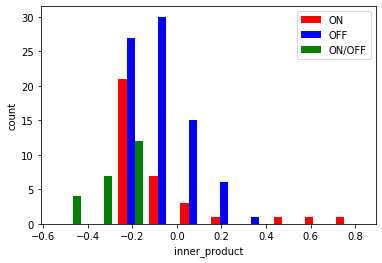

In [56]:
pysta.plot_hist_by_group(cluster_combined, "inner_product", 
                         "cell_type_combined", ["ON", "OFF", "ON/OFF"], ["r",'b','g'],
                         density=False)

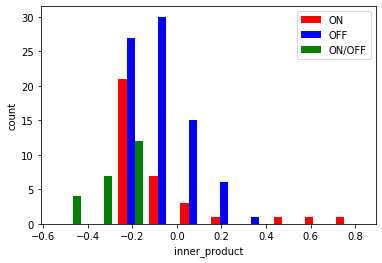

In [57]:
pysta.plot_hist_by_group(cluster_combined, "inner_product", 
                         "cell_type_combined", ["ON", "OFF", "ON/OFF"], ["r",'b','g'],
                         density=False)

In [58]:
cluster.groupby("cell_type").mean()

,num_spikes,PSNR,eig1,eig2,eig3,converged,PSNR1,PSNR2,weight1,weight2,inner_product
cell_type,,,,,,,,,,,
OFF,4555.485207,16.585761,1.177086,1.092602,1.045497,True,12.405428,10.314392,0.561508,0.438492,0.119448
ON,3263.219780,16.092398,0.931845,0.868955,0.839521,True,12.794743,10.525676,0.544275,0.455725,0.064662
unknown,2894.542636,7.353616,2.256193,2.006904,1.901224,True,6.393611,6.232177,0.508012,0.491988,-0.164181


In [59]:
cluster.groupby("cell_type").median()

,num_spikes,PSNR,eig1,eig2,eig3,converged,PSNR1,PSNR2,weight1,weight2,inner_product
cell_type,,,,,,,,,,,
OFF,2035,16.783862,0.744122,0.705149,0.690602,True,12.390242,9.959009,0.545922,0.454078,0.047001
ON,2190,16.491749,0.790669,0.728066,0.708054,True,10.967863,9.902817,0.530033,0.469967,-0.076766
unknown,379,6.715108,1.542122,1.461612,1.369387,True,6.169919,5.912301,0.501553,0.498447,-0.169158


In [60]:
cluster_with_enough_spikes.groupby("cell_type").mean()

,num_spikes,PSNR,eig1,eig2,eig3,converged,PSNR1,PSNR2,weight1,weight2,inner_product
cell_type,,,,,,,,,,,
OFF,8434.559524,19.986749,0.560809,0.527865,0.520567,True,14.897485,11.797414,0.537681,0.462319,-0.075664
ON,5491.687500,17.945806,0.618215,0.564730,0.555775,True,14.665386,11.541604,0.530580,0.469420,-0.141051
unknown,8718.897436,8.955758,0.508999,0.494311,0.487535,True,7.636257,7.626497,0.496000,0.504000,-0.237186


In [61]:
cluster_with_enough_spikes.groupby("cell_type").median()

,num_spikes,PSNR,eig1,eig2,eig3,converged,PSNR1,PSNR2,weight1,weight2,inner_product
cell_type,,,,,,,,,,,
OFF,7356.5,20.002697,0.546169,0.517231,0.509077,True,15.495882,11.375428,0.529477,0.470523,-0.097653
ON,4413.5,18.103037,0.567662,0.547633,0.539942,True,13.555439,10.307914,0.524311,0.475689,-0.201906
unknown,5207.0,8.960171,0.482386,0.475528,0.473101,True,6.601859,6.125527,0.498022,0.501978,-0.244086


In [62]:
cluster_combined.groupby("cell_type_combined").mean()

,num_spikes,PSNR,eig1,eig2,eig3,converged,PSNR1,PSNR2,weight1,weight2,inner_product
cell_type_combined,,,,,,,,,,,
OFF,8315.797468,20.183137,0.563911,0.530539,0.523238,True,14.752770,11.779143,0.538877,0.461123,-0.064067
ON,5380.657143,17.799815,0.595946,0.554106,0.546300,True,12.811415,9.859754,0.530197,0.469803,-0.074915
ON/OFF,7524.521739,15.923965,0.627006,0.561392,0.549498,True,17.770915,14.666806,0.516274,0.483726,-0.306964
unknown,8641.352941,8.995519,0.494264,0.485515,0.480114,True,6.780642,6.748028,0.499252,0.500748,-0.224498


In [63]:
cluster_combined.groupby("cell_type_combined").median()

,num_spikes,PSNR,eig1,eig2,eig3,converged,PSNR1,PSNR2,weight1,weight2,inner_product
cell_type_combined,,,,,,,,,,,
OFF,7291,20.351671,0.557716,0.517577,0.512286,True,15.449721,11.367329,0.535306,0.464694,-0.094374
ON,4206,17.685302,0.552245,0.543163,0.531247,True,10.942217,9.681854,0.511705,0.488295,-0.192967
ON/OFF,6622,16.838700,0.592556,0.552200,0.548982,True,18.447659,14.497231,0.524121,0.475879,-0.267992
unknown,5133,8.945242,0.475423,0.468544,0.466046,True,6.363394,6.081677,0.498842,0.501158,-0.243094


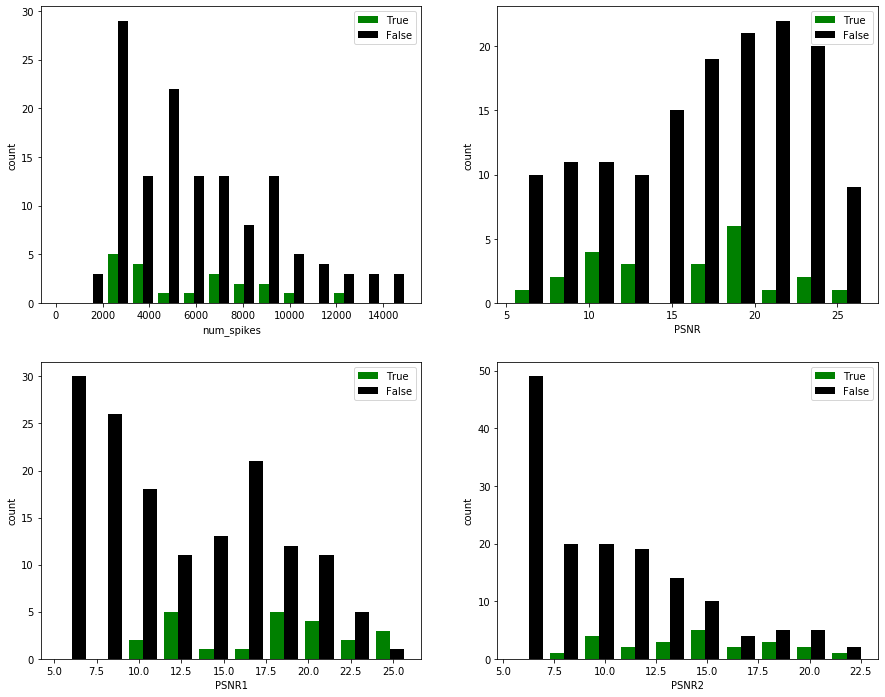

In [64]:
# plt.figure()
bins_for_num_spikes=np.linspace(0,15000,15)

plt.figure(figsize=(15,12))
plt.subplot(221)
pysta.plot_hist_by_group(cluster_combined, "num_spikes", 
                         group="cell_type_on_and_off", group_order=[True, False], group_color=["g", 'k'], bins=bins_for_num_spikes)
# plt.figure()
plt.subplot(222)
pysta.plot_hist_by_group(cluster_combined, "PSNR", 
                         group="cell_type_on_and_off", group_order=[True, False], group_color=["g", 'k'])
# plt.figure()
plt.subplot(223)
pysta.plot_hist_by_group(cluster_combined, "PSNR1", 
                         group="cell_type_on_and_off", group_order=[True, False], group_color=["g", 'k'])
# plt.figure()
plt.subplot(224)
pysta.plot_hist_by_group(cluster_combined, "PSNR2", 
                         group="cell_type_on_and_off", group_order=[True, False], group_color=["g", 'k'])

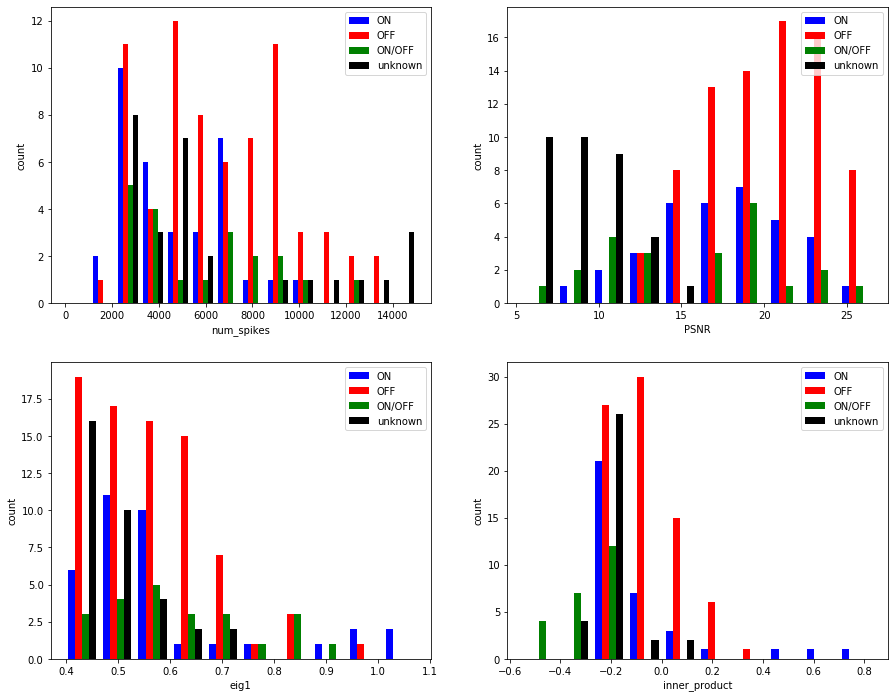

In [65]:
plt.figure(figsize=(15,12))
plt.subplot(221)
pysta.plot_hist_by_group(cluster_combined, "num_spikes", 
                         "cell_type_combined", ["ON", "OFF", "ON/OFF", "unknown"], ["b","r","g", 'k'], bins=bins_for_num_spikes)

plt.subplot(222)
pysta.plot_hist_by_group(cluster_combined, "PSNR", 
                         "cell_type_combined", ["ON", "OFF", "ON/OFF", "unknown"], ["b","r","g", 'k'])

plt.subplot(223)
pysta.plot_hist_by_group(cluster_combined, "eig1", 
                         "cell_type_combined", ["ON", "OFF", "ON/OFF", "unknown"], ["b","r","g", 'k'])

plt.subplot(224)
pysta.plot_hist_by_group(cluster_combined, "inner_product", 
                         "cell_type_combined", ["ON", "OFF", "ON/OFF", "unknown"], ["b","r","g", 'k'])

plt.savefig("figure/cluster_result_dim{}_spd{}.png".format(cluster_dim,spike_per_dim))
plt.savefig("figure/cluster_result_dim{}_spd{}.pdf".format(cluster_dim,spike_per_dim))
# cluster_combined.hist("PSNR", by="cell_type_clustered", sharex=True)
# cluster_combined.hist("PSNR1", by="cell_type_clustered", sharex=True)
# cluster_combined.hist("PSNR2", by="cell_type_clustered", sharex=True)


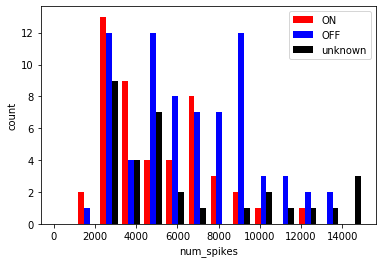

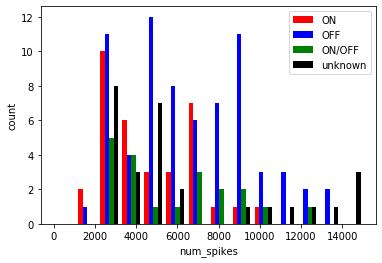

In [66]:
# original cell type vs. clustered
# col = "PSNR"
col = "num_spikes"
plt.figure()
pysta.plot_hist_by_cell_type(cluster_combined, col, bins=bins_for_num_spikes)
plt.figure()
pysta.plot_hist_by_group(cluster_combined, col, "cell_type_combined", 
                         ["ON","OFF","ON/OFF","unknown"], ["r", "b", "g", "k"], bins=bins_for_num_spikes)

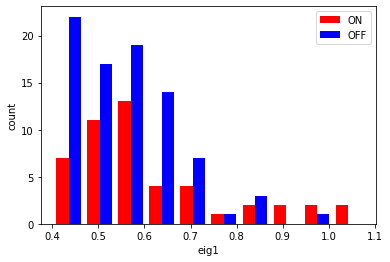

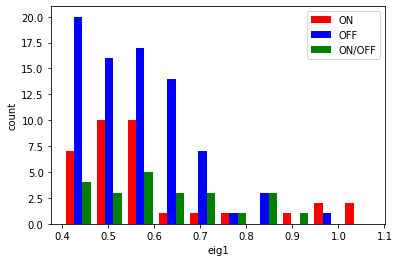

In [67]:
# original cell type vs. clustered
plt.figure()
pysta.plot_hist_by_group(cluster_combined, "eig1", 
                         "cell_type", ["ON","OFF"], ["r", "b"])
#                          "cell_type", ["ON","OFF","unknown"], ["r", "b", "k"])
plt.figure()
pysta.plot_hist_by_group(cluster_combined, "eig1", 
                         "cell_type_combined", ["ON","OFF","ON/OFF"], ["r", "b", "g"])
#                          "cell_type_combined", ["ON","OFF","ON/OFF","unknown"], ["r", "b", "g", "k"])

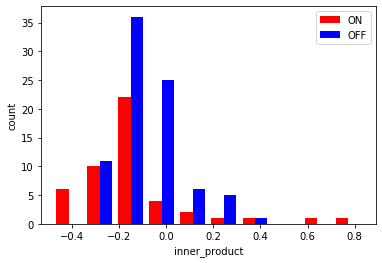

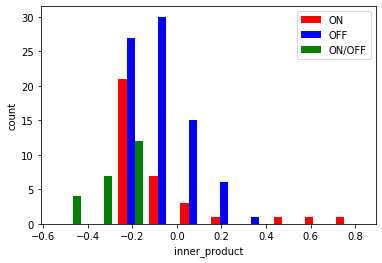

In [68]:
# original cell type vs. clustered
plt.figure()
pysta.plot_hist_by_group(cluster_combined, "inner_product", 
                         "cell_type", ["ON","OFF"], ["r", "b"])
#                          "cell_type", ["ON","OFF","unknown"], ["r", "b", "k"])
plt.figure()
pysta.plot_hist_by_group(cluster_combined, "inner_product", 
                         "cell_type_combined", ["ON","OFF","ON/OFF"], ["r", "b", "g"])                         
#                          "cell_type_combined", ["ON","OFF","ON/OFF","unknown"], ["r", "b", "g", "k"])

In [69]:
plot_examples(cluster_checked, cluster_dim, temporal_profile=True, spatial_profile=[1, 2], filename="combined_cluster_dim{}_spd{}_checked".format(cluster_dim,spike_per_dim))

TypeError: plot_examples() got an unexpected keyword argument 'filename'

In [ ]:
# plt.hist(PSNR1_selected)
# plt.show()
# plt.hist(PSNR2_selected)
# plt.show()
# plt.scatter(PSNR1_selected,PSNR2_selected)
# plt.plot([5,25],[5,25], 'k--')
# plt.xlabel('PSNR1')
# plt.ylabel('PSNR2')
# plt.show()
# plt.scatter(PSNR_selected,PSNR1_selected)
# plt.scatter(PSNR_selected,PSNR2_selected)
# plt.plot([5,25],[5,25], 'k--')
# plt.xlabel('PSNR')
# plt.legend(['','PSNR1', 'PSNR2'])
# plt.show()

In [ ]:

plt.hist(cluster_checked["cell_type"])

print(len(cluster_checked))
cluster_checked["cell_type"].value_counts()

In [ ]:
# # sort by inner product and plot

# cluster_sorted_by_eig1 = cluster_with_enough_samples.sort_values('eig1').head(30)#.sort_values("dataset")

# plot_examples(cluster_sorted_by_eig1, "cluster_eig", dim=dim)




In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(121)
pysta.plot_scatter_by_cell_type(cluster_checked,["PSNR","PSNR1"])
plt.plot([7.5,25], [7.5,25], 'k--')
plt.subplot(122)
pysta.plot_scatter_by_cell_type(cluster_checked,["PSNR","PSNR2"])
plt.plot([7.5,25], [7.5,25], 'k--')

In [ ]:
plot_scatter(cluster_checked)

## compare results with d=2 and d=3

In [ ]:
on_and_off_dim2 = pd.read_csv("on_and_off_dim2.csv")
on_and_off_dim3 = pd.read_csv("on_and_off_dim3.csv")



channel_on_and_off_dim2 = set(on_and_off_dim2["channel_name"])
channel_on_and_off_dim3 = set(on_and_off_dim3["channel_name"])
channel_on_and_off_union = channel_on_and_off_dim2.union(channel_on_and_off_dim3)
channel_on_and_off_intersection = channel_on_and_off_dim2.intersection(channel_on_and_off_dim3)

print(len(channel_on_and_off_dim2))
print(len(channel_on_and_off_dim3))
print(len(channel_on_and_off_union))
print(len(channel_on_and_off_intersection))

print("union:", channel_on_and_off_union)
print("intersect:", channel_on_and_off_intersection)
print("dim=2 only:", channel_on_and_off_dim2 - channel_on_and_off_dim3)
print("dim=3 only:", channel_on_and_off_dim3 - channel_on_and_off_dim2)

In [ ]:
# compare results
d2 = np.load("data/clustered_dim2.npz", allow_pickle=True)
d2_channel_names = [info["channel_name"] for info in d2["info"]]

d3 = np.load("data/clustered_dim3.npz", allow_pickle=True)
d3_channel_names = [info["channel_name"] for info in d3["info"]]    

def find_channel_index(channel_names, channel_name):
    for i, ch in enumerate(channel_names):
        if ch == channel_name:
            return i
    return None # not found

for channel_name in channel_on_and_off_union:
    print(channel_name)
        
    idx2 = find_channel_index(d2_channel_names, channel_name)
    idx3 = find_channel_index(d3_channel_names, channel_name)    
#     print(idx2, idx3)

    is_on_and_off_dim2 = channel_name in channel_on_and_off_dim2    
    is_on_and_off_dim3 = channel_name in channel_on_and_off_dim3
    print(is_on_and_off_dim2, is_on_and_off_dim3)
    
    sta = d2['X_train'][idx2]
    group_center1 = d2['X_test'][idx2*2]
    group_center2 = d2['X_test'][idx2*2+1]    

    tap = 8
    dt = 100
    grid_T = np.linspace(-tap + 1, 0, tap) * dt
    stcl.plot_centers(sta, [group_center1, group_center2], grid_T)
    
    sta = d3['X_train'][idx3]
    group_center1 = d3['X_test'][idx3*2]
    group_center2 = d3['X_test'][idx3*2+1]    
    stcl.plot_centers(sta, [group_center1, group_center2], grid_T)
    

In [ ]:
 d2['X_test'].shape

In [ ]:
d2["X_train"].shape

In [ ]:
d3_channel_names

In [ ]:
for k in d2.keys():
    print(k)